In [88]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
set_style("whitegrid")

In [37]:
clTrials = pd.read_csv("CancerClinicalTrialData.csv")

In [38]:
Counter(clTrials["Funded Bys"]).most_common

<bound method Counter.most_common of Counter({'Industry': 4053, 'Other': 2515, 'Other|Industry': 1851, 'Other|NIH': 1471, 'NIH': 786, 'Industry|Other': 146, 'Other|NIH|Industry': 117, 'NIH|Other': 76, 'Other|Industry|NIH': 42, 'Other|U.S. Fed': 41, 'U.S. Fed': 33, 'U.S. Fed|Other': 13, 'Industry|NIH': 13, 'Other|U.S. Fed|Industry': 8, 'Other|Industry|U.S. Fed': 7, 'NIH|Industry': 6, 'Other|U.S. Fed|NIH': 4, 'Industry|Other|U.S. Fed': 2, 'Industry|Other|NIH': 2, 'Industry|NIH|Other': 2, 'U.S. Fed|Industry': 2, 'NIH|Other|Industry': 2, 'U.S. Fed|NIH|Other': 1, 'U.S. Fed|NIH': 1, 'NIH|Other|U.S. Fed': 1, 'Industry|U.S. Fed': 1})>

In [85]:
clTrials

,Rank,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,...,Melanoma Cancer,Pancreatic Cancer,Treatment (Purpose),Fed Funding,Industry Funding,Female,Male,Metastatic,Phases Num,Completed Status
1,2,A Phase II Study of Nivolumab in Combination W...,Completed,Has Results,Breast Cancer,Drug: Nivolumab|Drug: Cabozantinib,Overall Response Rate|Number of Participants W...,Female,"18 Years and older (Adult, Older Adult)",Phase 2,...,0,0,1,1,0,1,0,0,3,1
3,4,Fulvestrant Plus Enzalutamide in ER+/Her2- Adv...,Completed,Has Results,Breast Cancer,Drug: Fulvestrant with Enzalutamide,Clinical Benefit Rate of the Combination of En...,Female,"18 Years to 100 Years (Adult, Older Adult)",Phase 2,...,0,0,1,0,1,1,0,0,3,1
8,9,4D Image-Guided Partial Breast Radiation in St...,Completed,Has Results,Breast Cancer,Radiation: 4D Conformal Image-Guided Partial B...,Patients With Reduction in Incidental Radiatio...,Female,"50 Years and older (Adult, Older Adult)",Not Applicable,...,0,0,1,0,0,1,0,0,0,1
13,14,Intrathecal Trastuzumab for Leptomeningeal Met...,Completed,Has Results,Breast Cancer,Radiation: Trastuzumab,Number of Dose Limiting Toxicities (DLT) of IT...,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,...,0,0,1,0,0,0,0,0,2,1
15,16,A Study of Eribulin Mesylate With Trastuzumab ...,Completed,Has Results,Breast Cancer,Drug: E7389,Number of Participants With Dose Limiting Toxi...,Female,"20 Years to 74 Years (Adult, Older Adult)",Phase 1,...,0,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,11186,Human IL-15 (rhIL-15) and Obinutuzumab for Rel...,Terminated,Has Results,Leukemia|Lymphocytic|Chronic|B-Cell,Drug: rhIL-15|Biological: Obinutuzumab,Number of Treatment-emergent Adverse Events (A...,All,"18 Years and older (Adult, Older Adult)",Phase 1,...,0,0,1,0,1,0,0,0,1,0
11186,11187,"BN-Brachyury, Entinostat, Adotrastuzumab Emtan...",Terminated,Has Results,Breast Cancer|Triple Negative Breast Cancer|HE...,Biological: Brachyury-TRICOM|Drug: Entinostat|...,Overall Response (Partial Response + Complete ...,All,"18 Years and older (Adult, Older Adult)",Phase 1,...,0,0,1,0,1,0,0,1,1,0
11187,11188,Optune Device - TT Field Plus Nivolumab and Ip...,Terminated,Has Results,Melanoma With Brain Metastasis,Device: Optune|Biological: Nivolumab|Biologica...,Intracranial Progression-free Survival|Overall...,All,"18 Years and older (Adult, Older Adult)",Phase 2,...,1,0,1,1,0,0,0,0,3,0
11193,11194,Immune Checkpoint Inhibitor M7824 and the Immu...,Terminated,Has Results,Histologically or Cytologically Confirmed Panc...,Drug: M7824|Drug: M9241|Radiation: SBRT,Recommended Phase 2 Dose (RP2D) of NHS-IL12 (M...,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,...,0,1,1,0,1,0,0,1,2,0


In [40]:
def check_breast_substring(x):
    if "Breast" in x:
        return 1
    else:
        return 0
def check_blood_substring(x):
    if "Leukemia" in x:
        return 1
    elif "Lymphoma" in x:
        return 1
    elif "Myeloma" in x:
        return 1
    elif "Blood" in x:
        return 1
    else:
        return 0
def check_lung_substring(x):
    if "Lung" in x:
        return 1
    else:
        return 0
def check_colorectal_substring(x):
    if "Colorectal" in x:
        return 1
    else:
        return 0
def check_ovarian_substring(x):
    if "Ovarian" in x:
        return 1
    else:
        return 0
def check_cervical_substring(x):
    if "Cervical" in x:
        return 1
    else:
        return 0
    
def check_melanoma_substring(x):
    if "Melanoma" in x:
        return 1
    else:
        return 0
    
def check_pancreatic_substring(x):
    if "Pancreatic" in x:
        return 1
    else:
        return 0
def check_treatment_substring(x):
    if "Treatment" in x:
        return 1
    else:
        return 0
def check_industry_substring(x):
    if "Industry" in x:
        return 1
    else:
        return 0
def check_fed_substring(x):
    if "Fed" in x:
        return 1
    elif "NIH" in x:
        return 1
    else:
        return 0
def check_female_substring(x):
    if "Female" in x:
        return 1
    else:
        return 0    
def check_male_substring(x):
    if "Male" in x:
        return 1
    else:
        return 0    
def check_metastatic_substring(x):
    if "Metastatic" in x:
        return 1
    else:
        return 0     
def check_complete_substring(x):
    if "Completed" in x:
        return 1
    else:
        return 0     

In [73]:
clTrials["Breast Cancer"] = clTrials["Conditions"].apply(check_breast_substring)
clTrials["Blood Cancer"] = clTrials["Conditions"].apply(check_blood_substring)
clTrials["Lung Cancer"] = clTrials["Conditions"].apply(check_lung_substring)
clTrials["Colorectal Cancer"] = clTrials["Conditions"].apply(check_colorectal_substring)
clTrials["Ovarian Cancer"] = clTrials["Conditions"].apply(check_ovarian_substring)
clTrials["Cervical Cancer"] = clTrials["Conditions"].apply(check_cervical_substring)
clTrials["Melanoma Cancer"] = clTrials["Conditions"].apply(check_melanoma_substring)
clTrials["Pancreatic Cancer"] = clTrials["Conditions"].apply(check_pancreatic_substring)
clTrials['Study Designs'] = clTrials['Study Designs'].astype('str')
clTrials["Treatment (Purpose)"] = clTrials["Study Designs"].apply(check_treatment_substring)
clTrials["Fed Funding"] = clTrials["Funded Bys"].apply(check_industry_substring)
clTrials["Industry Funding"] = clTrials["Funded Bys"].apply(check_fed_substring)
clTrials['Gender'] = clTrials['Gender'].astype('str')
clTrials["Female"] = clTrials["Gender"].apply(check_female_substring)
clTrials["Male"] = clTrials["Gender"].apply(check_male_substring)
clTrials["Metastatic"] = clTrials["Conditions"].apply(check_metastatic_substring)
phase_mapper = {"Not Applicable":0, "Early Phase 1":1, "Phase 1":1, "Phase 1|Phase 2":2, "Phase 2":3, "Phase 2|Phase 3":4, "Phase 3":5, "Phase 4":6}
clTrials["Phases Num"] = clTrials["Phases"].replace(phase_mapper)
clTrials["Completed Status"] = clTrials["Status"].apply(check_complete_substring)

In [42]:
clTrials = clTrials[clTrials["Treatment (Purpose)"] == 1]

In [43]:
Counter(clTrials["Breast Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 8498, 1: 1029})>

In [44]:
Counter(clTrials["Blood Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 7443, 1: 2084})>

In [45]:
Counter(clTrials["Lung Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 8561, 1: 966})>

In [46]:
Br = clTrials["Breast Cancer"] == 1 
Bl = clTrials["Blood Cancer"] == 1 
Co = clTrials["Colorectal Cancer"] == 1 
Ov = clTrials["Ovarian Cancer"] == 1 
Ce = clTrials["Cervical Cancer"] == 1 
Me = clTrials["Melanoma Cancer"] == 1
Pa = clTrials["Pancreatic Cancer"] == 1
np.size(clTrials[Br | Bl | Co | Ov | Ce | Me | Pa],0)

4420

In [47]:
Counter(clTrials["Metastatic"]).most_common

<bound method Counter.most_common of Counter({0: 8859, 1: 668})>

In [48]:
clTrials = clTrials[Br | Bl | Co | Ov | Ce | Me | Pa]

In [54]:
Counter(clTrials["Breast Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 3391, 1: 1029})>

In [57]:
met = clTrials["Metastatic"] == 1
notMet = clTrials["Metastatic"] == 0
comp = clTrials["Completed Status"] == 1
perMetComp = np.size(clTrials[met & comp],0) / 378 * 100
perNotMetComp = np.size(clTrials[notMet & comp],0) / 4042 * 100

print(perMetComp)
print(perNotMetComp)

71.16402116402116
72.88471053933696


In [74]:
Counter(clTrials["Phases Num"]).most_common

<bound method Counter.most_common of Counter({3: 2567, 2: 640, 5: 520, 1: 377, 0: 220, 6: 66, 4: 30})>

In [69]:
Br = clTrials["Breast Cancer"] == 1 
Bl = clTrials["Blood Cancer"] == 1 
Co = clTrials["Colorectal Cancer"] == 1 
Ov = clTrials["Ovarian Cancer"] == 1 
Ce = clTrials["Cervical Cancer"] == 1 
Me = clTrials["Melanoma Cancer"] == 1
Pa = clTrials["Pancreatic Cancer"] == 1
Fe = clTrials["Female"] == 1
Ma = clTrials["Female"] == 0

perBrComp = np.size(clTrials[Br & comp],0) / 1029 * 100
perBlComp = np.size(clTrials[Bl & comp],0) / 2084 * 100

print(perBrComp)
print(perBlComp)

74.82993197278913
71.83301343570058


In [65]:
perFeComp = np.size(clTrials[Fe & comp],0) / 938 * 100

print(perFeComp)

74.6268656716418


In [70]:
perNotFeComp = np.size(clTrials[Ma & comp],0) / 3482 * 100

print(perNotFeComp)

72.22860425043078


In [78]:
P1 = clTrials["Phases Num"] == 1
perP1Comp = np.size(clTrials[P1 & comp],0) / 377 * 100
print(perP1Comp)

P2 = clTrials["Phases Num"] == 2
perP2Comp = np.size(clTrials[P2 & comp],0) / 640 * 100
print(perP2Comp)

P3 = clTrials["Phases Num"] == 3
perP3Comp = np.size(clTrials[P3 & comp],0) / 2567 * 100
print(perP3Comp)

P4 = clTrials["Phases Num"] == 4
perP4Comp = np.size(clTrials[P4 & comp],0) / 30 * 100
print(perP4Comp)

P5 = clTrials["Phases Num"] == 5
perP5Comp = np.size(clTrials[P5 & comp],0) / 520 * 100
print(perP5Comp)

P6 = clTrials["Phases Num"] == 6
perP6Comp = np.size(clTrials[P6 & comp],0) / 66 * 100
print(perP6Comp)

P0 = clTrials["Phases Num"] == 0
perP0Comp = np.size(clTrials[P0 & comp],0) / 220 * 100
print(perP0Comp)


73.74005305039788
66.875
71.71795870666148
70.0
83.26923076923077
84.84848484848484
71.81818181818181


In [79]:
Counter(clTrials["Funded Bys"]).most_common

<bound method Counter.most_common of Counter({'Industry': 1593, 'Other': 855, 'Other|Industry': 837, 'Other|NIH': 610, 'NIH': 336, 'Industry|Other': 67, 'Other|NIH|Industry': 47, 'NIH|Other': 34, 'Other|Industry|NIH': 18, 'Other|U.S. Fed': 6, 'Industry|NIH': 5, 'NIH|Industry': 3, 'Other|U.S. Fed|Industry': 2, 'Other|Industry|U.S. Fed': 2, 'Industry|Other|U.S. Fed': 1, 'U.S. Fed': 1, 'Industry|NIH|Other': 1, 'Other|U.S. Fed|NIH': 1, 'Industry|Other|NIH': 1})>

In [81]:
np.size(clTrials[clTrials["Fed Funding"] == 1],0)

2577

In [82]:
F1 = clTrials["Industry Funding"] == 1
perF1Comp = np.size(clTrials[F1 & comp],0) / 1068 * 100
print(perF1Comp)

F2 = clTrials["Fed Funding"] == 1
perF2Comp = np.size(clTrials[F2 & comp],0) / 2577 * 100
print(perF2Comp)


73.40823970037454
74.54404346138921


In [83]:
np.size(clTrials[~(F1 | F2)],0)

855

In [84]:
perF3Comp = np.size(clTrials[~(F1 | F2) & comp],0) / 855 * 100
print(perF3Comp)

65.84795321637426


In [86]:
clTrials.columns

Index(['Rank', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Designs', 'Start Date',
       'Completion Date', 'Study Duration (months)', 'Locations', 'URL',
       'Breast Cancer', 'Blood Cancer', 'Lung Cancer', 'Colorectal Cancer',
       'Ovarian Cancer', 'Cervical Cancer', 'Melanoma Cancer',
       'Pancreatic Cancer', 'Treatment (Purpose)', 'Fed Funding',
       'Industry Funding', 'Female', 'Male', 'Metastatic', 'Phases Num',
       'Completed Status'],
      dtype='object')

In [90]:
clTrials_train, clTrials_test = train_test_split(clTrials.copy(), 
                                            shuffle=True,
                                            random_state=314,
                                            stratify=clTrials['Completed Status'],
                                            test_size=.2)

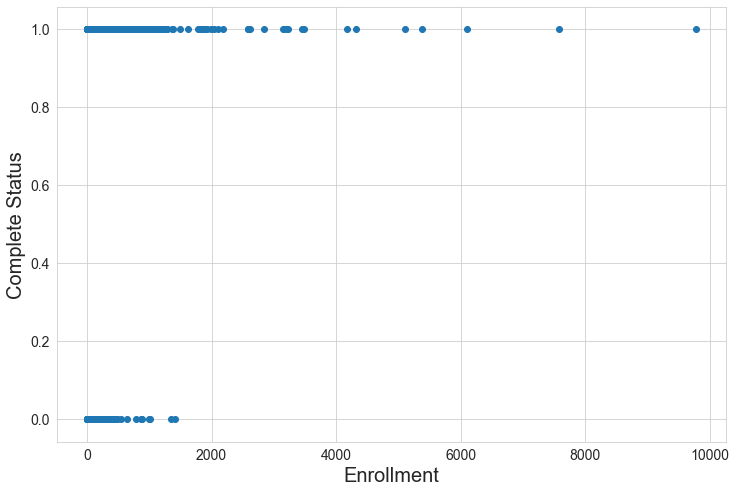

In [94]:
plt.figure(figsize=(12,8))

plt.scatter(clTrials_train["Enrollment"],
               clTrials_train["Completed Status"])

plt.xlabel("Enrollment", fontsize=20)
plt.ylabel("Complete Status", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()